<a href="https://colab.research.google.com/github/NadiaAnwar121/Fashion-MNIST/blob/main/Capstone_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

data_path = '/content/drive/MyDrive/Capstone Project/plant village dataset'

os.listdir(data_path)
IMAGE_SIZE = 64

In [ ]:
dict= {

}

In [ ]:

from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# List of subfolders (assuming these are the only subfolders in the main directory)
subfolders = ['patato', 'pepper', 'tomato']

# List of disease types for each subfolder
disease_types = {
    'patato': ['Potato__Early_blight', 'Potato__Late_blight', 'Potato__healthy'],
    'pepper': ['Pepper__bell__Bacterial_spot', 'Pepper__bell__healthy'],
    'tomato': [
        'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight',
        'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot',
        'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot',
        'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus',
        'Tomato__healthy'
    ]
}

# Path to the main folder
data_dir = '/content/drive/MyDrive/Capstone Project/plant village dataset/'

# Function to read and preprocess images recursively
def preprocess_images_recursive(folder_path, target_size=64):
    images = []
    labels = []

    target_size = (target_size, target_size)

    for subfolder in subfolders:
        subfolder_path = os.path.join(folder_path, subfolder)
        for disease_type in disease_types[subfolder]:
            # Replace double underscores with a single underscore
            corrected_disease_type = disease_type.replace('__', '_')
            disease_folder_path = os.path.join(subfolder_path, corrected_disease_type)
            for entry in os.scandir(disease_folder_path):
                if entry.is_file() and entry.name.endswith(('.jpg','.JPG', '.jpeg', '.png')):
                    img_path = entry.path
                    img = Image.open(img_path).convert('RGB').resize(target_size)
                    images.append(np.array(img))
                    labels.append(corrected_disease_type)

    return images, labels

# Read and preprocess images
images, labels = preprocess_images_recursive(data_dir, IMAGE_SIZE)

In [ ]:

len(images)

20586

In [ ]:
len(labels)

20586

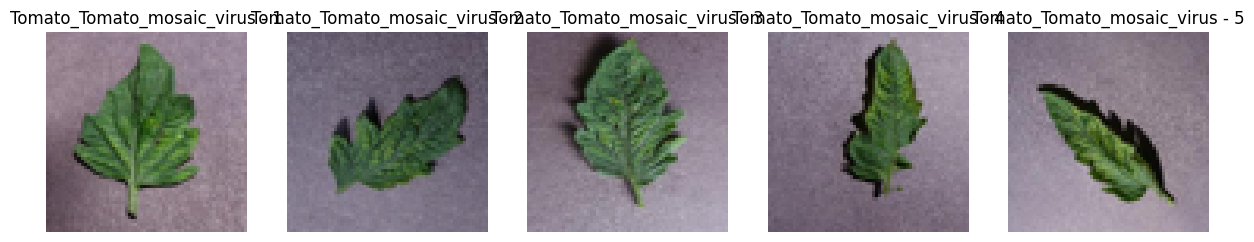

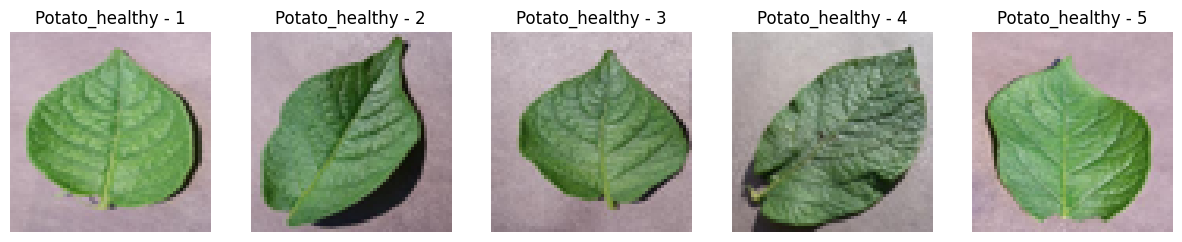

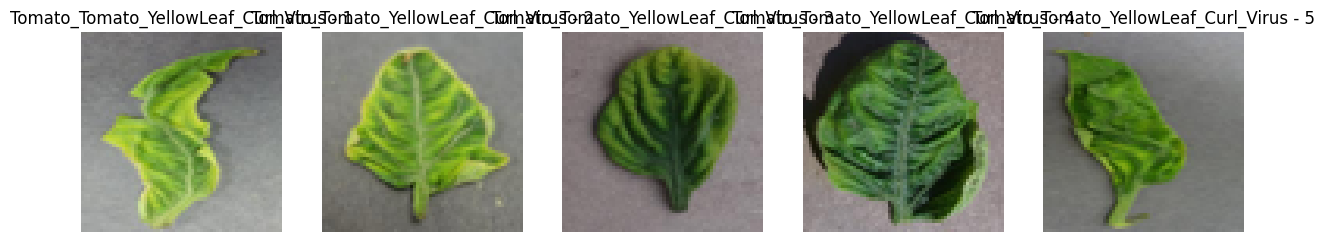

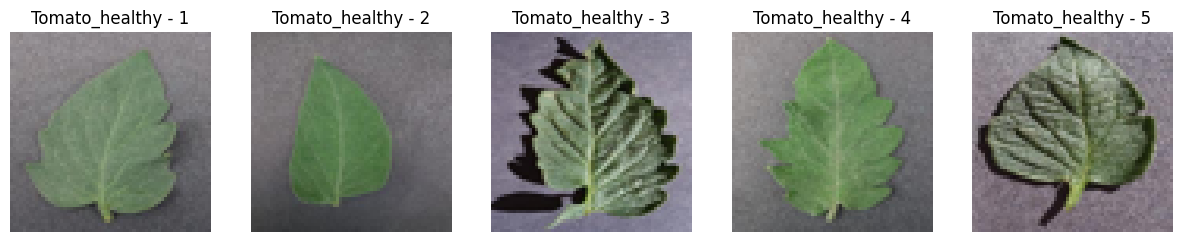

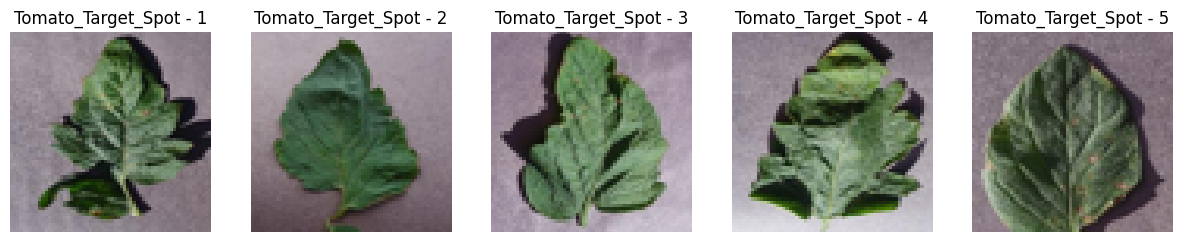

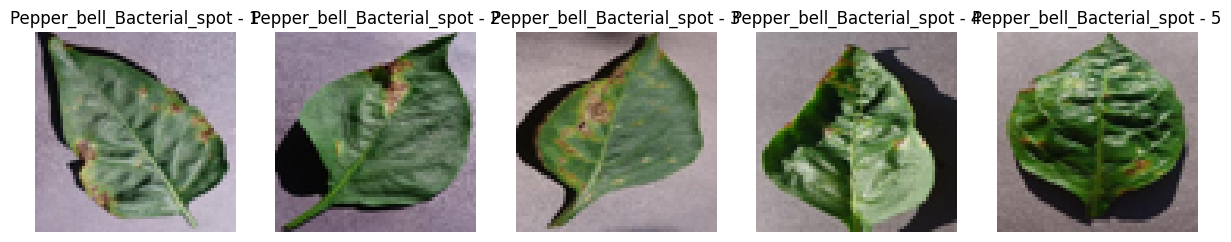

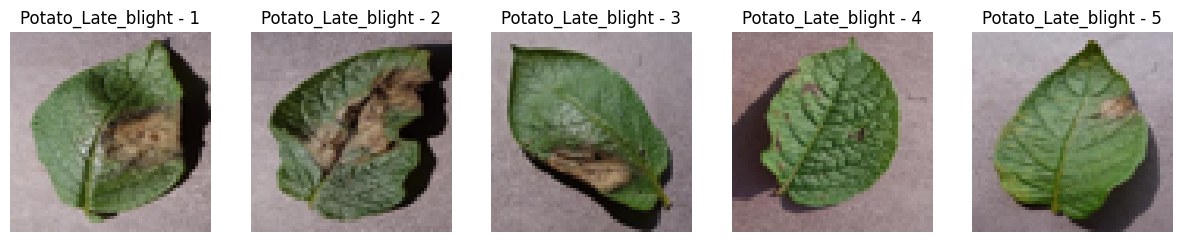

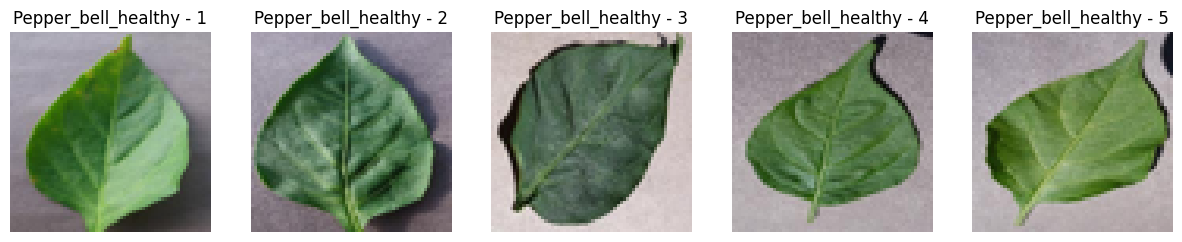

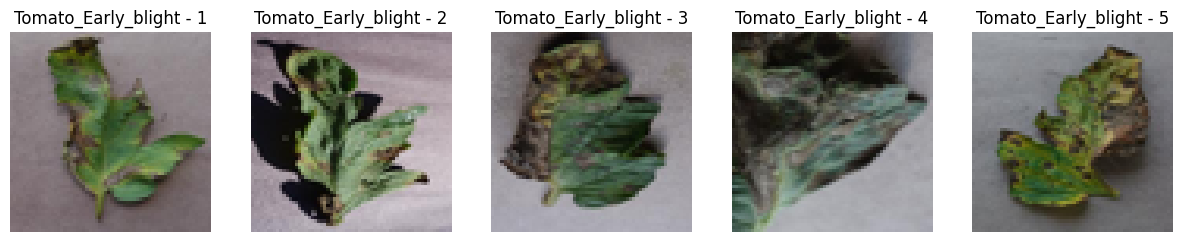

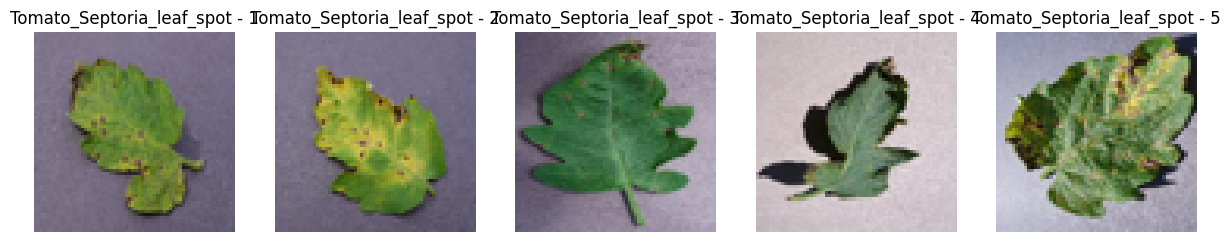

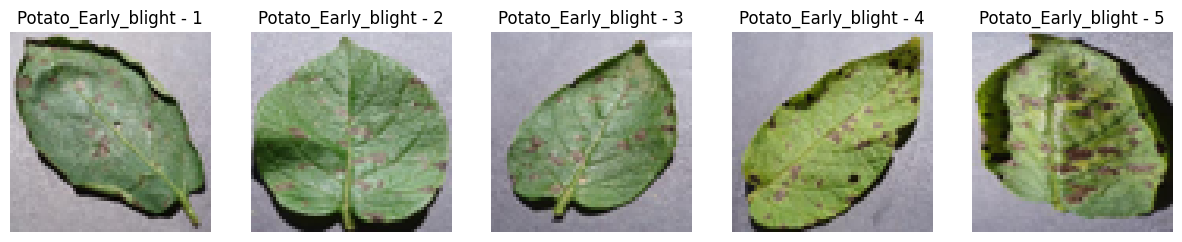

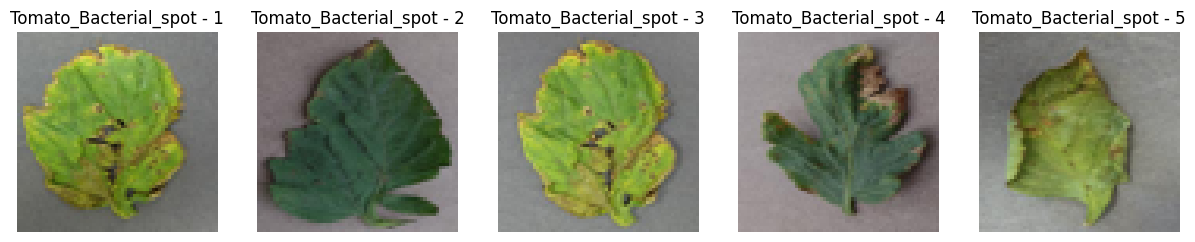

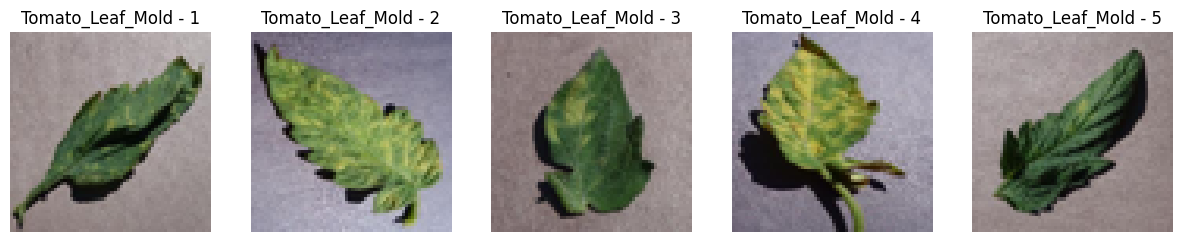

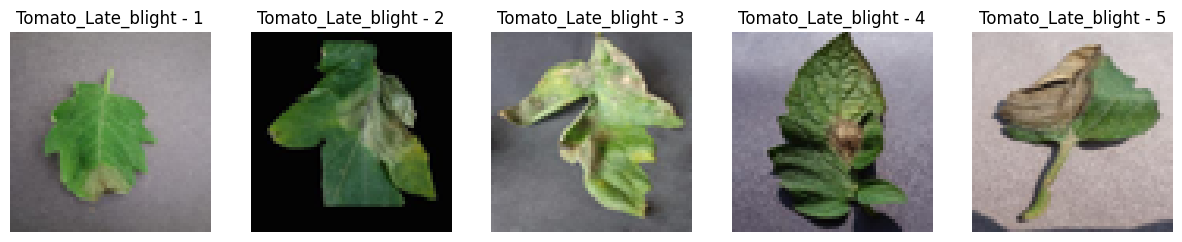

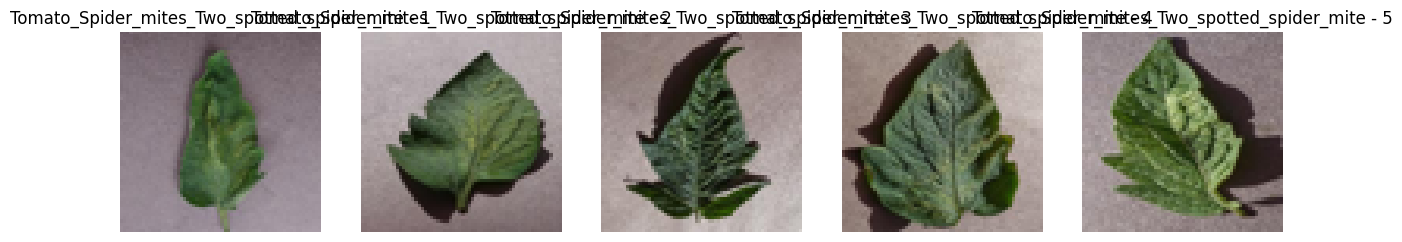

In [ ]:
import matplotlib.pyplot as plt

def display_images(images, labels, num_images=5):
    unique_labels = set(labels)

    for disease_type in unique_labels:
        indices = [i for i, label in enumerate(labels) if label == disease_type]
        selected_indices = indices[:num_images]

        fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

        for i, index in enumerate(selected_indices):
            ax = axes[i]
            ax.imshow(images[index])
            ax.set_title(f'{disease_type} - {i + 1}')
            ax.axis('off')

        plt.show()

# Display images for each disease type
display_images(images, labels, num_images=5)

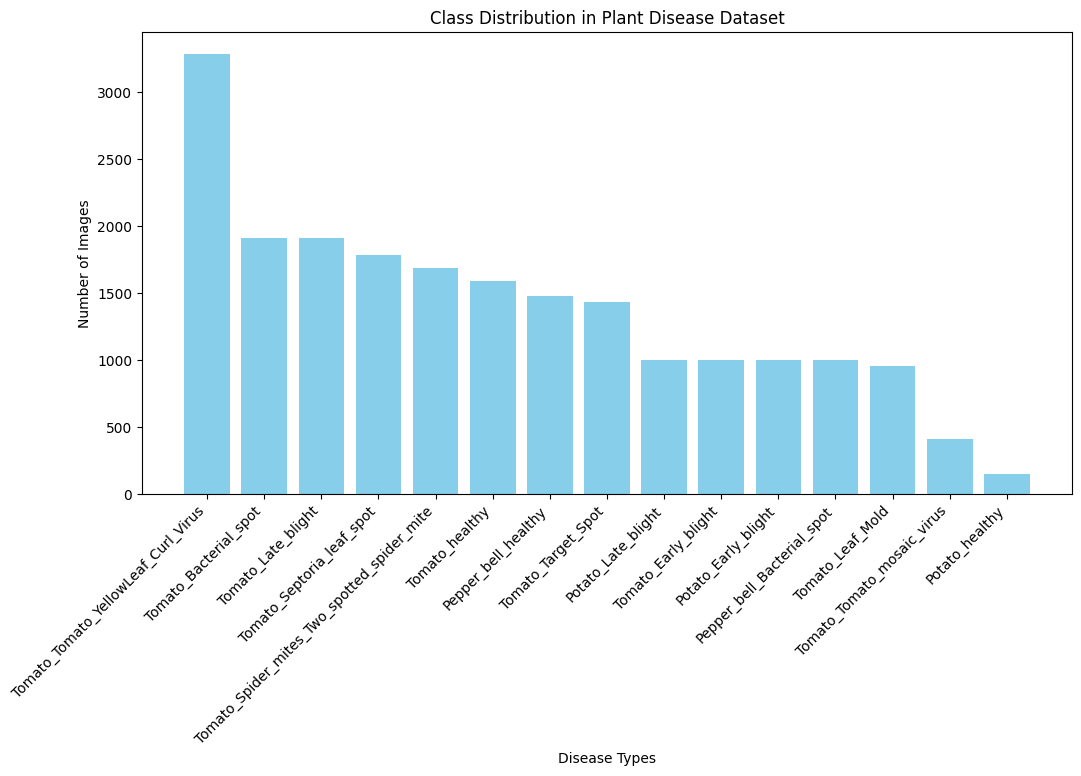

In [ ]:
import os
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset and have 'labels' available

# Count the occurrences of each class
class_counts = {label: labels.count(label) for label in set(labels)}

# Sort the classes based on their counts
sorted_classes = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)

# Separate the class names and counts
class_names, class_values = zip(*sorted_classes)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(class_names, class_values, color='skyblue')
plt.xlabel('Disease Types')
plt.ylabel('Number of Images')
plt.title('Class Distribution in Plant Disease Dataset')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


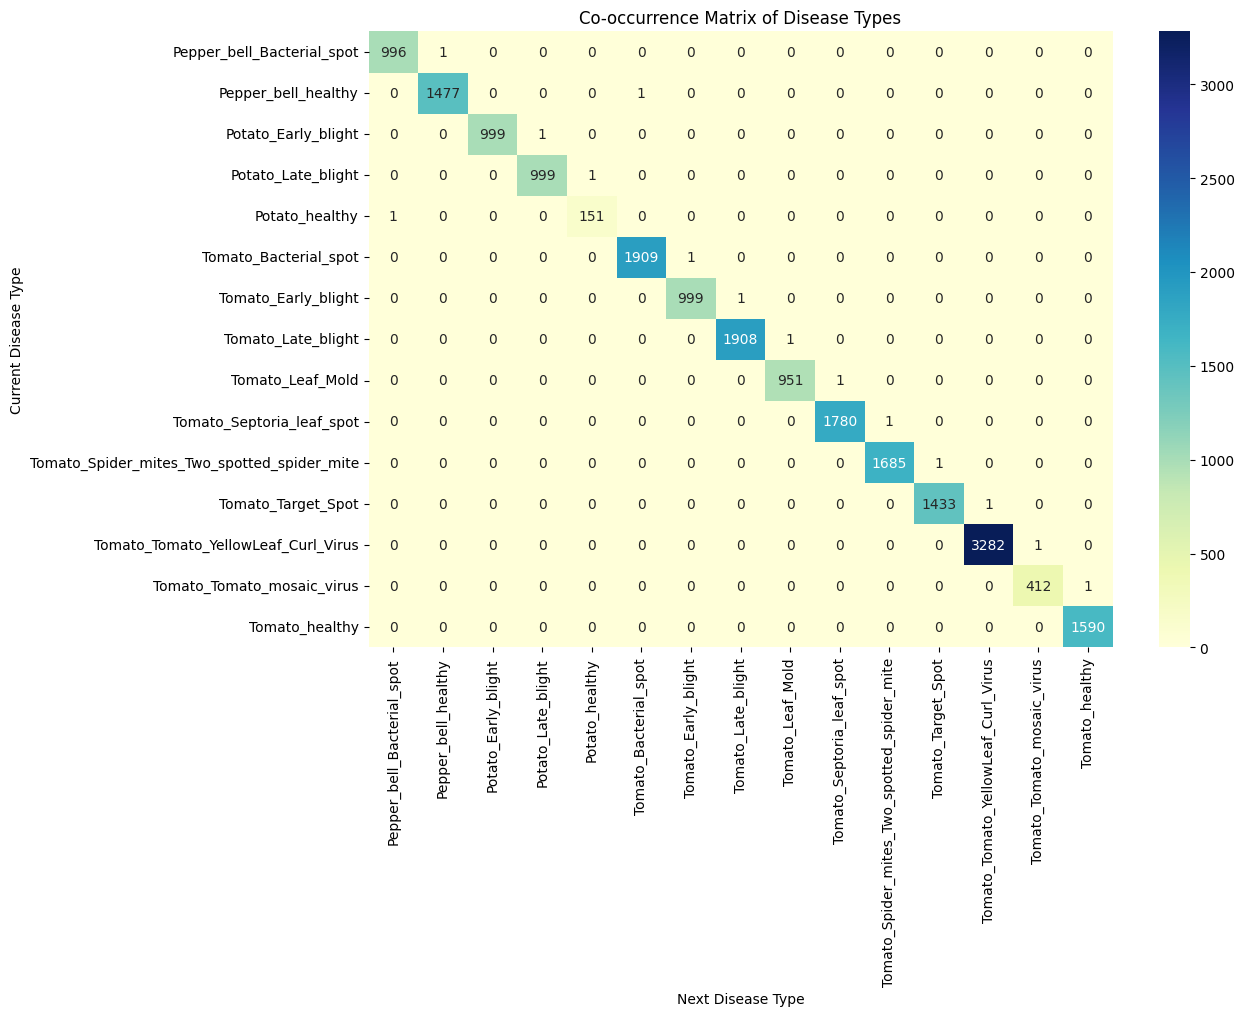

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a co-occurrence matrix
co_occurrence_matrix = np.zeros((len(set(labels)), len(set(labels))), dtype=int)

# Iterate through pairs of labels and update the co-occurrence matrix
for label1 in set(labels):
    for label2 in set(labels):
        co_occurrence_matrix[sorted(list(set(labels))).index(label1)][sorted(list(set(labels))).index(label2)] = sum([1 for i in range(len(labels) - 1) if labels[i] == label1 and labels[i+1] == label2])

# Plot the co-occurrence matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(co_occurrence_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=sorted(list(set(labels))), yticklabels=sorted(list(set(labels))))
plt.xlabel('Next Disease Type')
plt.ylabel('Current Disease Type')
plt.title('Co-occurrence Matrix of Disease Types')
plt.show()

In [ ]:

pip install scikit-learn imgaug tensorflow


In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Assuming you have loaded and prepared your images, labels, majority_class_data_1d, minority_classes_data_1d

# Identify majority and minority classes
correct_majority_class = 'Tomato_Tomato_YellowLeaf_Curl_Virus'
minority_classes = [
    'Potato_Early_blight', 'Potato_Late_blight', 'Potato_healthy',
    'Pepper_bell_Bacterial_spot', 'Pepper_bell_healthy',
    'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight',
    'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot',
    'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Target_Spot',
    'Tomato_Tomato_mosaic_virus', 'Tomato_healthy'
]

# Create a dictionary to store resampled data for each class
resampled_data = {}

In [ ]:
from tqdm import tqdm

In [ ]:

# Step 1: Balance the data using SMOTE for each minority class
X_resampled = []
y_resampled = []

# Balance data using SMOTE for each minority class
for minority_class in tqdm(minority_classes):
    # Filter images and labels based on classes
    majority_class_data = [[image, label] for image, label in zip(images, labels) if label == correct_majority_class]
    minority_class_data = [[image, label] for image, label in zip(images, labels) if label == minority_class]


    majority_images = [image for image, label in majority_class_data]
    majority_labels = [label for image, label in majority_class_data]

    minority_images = [image for image, label in minority_class_data]
    minority_labels = [label for image, label in minority_class_data]

    # Concatenate majority and minority class data
    combined_images = np.concatenate([majority_images, minority_images]).reshape((-1, IMAGE_SIZE*IMAGE_SIZE*3))
    combined_labels = np.concatenate([majority_labels, minority_labels])

    # Balance data using SMOTE
    smote = SMOTE(random_state=42)
    resampled_data_1d, targets_resampled = smote.fit_resample(combined_images, combined_labels)


    Resampled_minority = [[image, label] for image, label in zip(resampled_data_1d, targets_resampled) if label == minority_class]
    Resampled_minority_images = [image for image, label in Resampled_minority]
    Resampled_minority_labels = [label for image, label in Resampled_minority]
    Resampled_minority_images = np.reshape(Resampled_minority_images, (-1, IMAGE_SIZE, IMAGE_SIZE, 3))

    X_resampled.append(Resampled_minority_images)
    y_resampled.append(Resampled_minority_labels)

100%|██████████| 14/14 [00:19<00:00,  1.42s/it]


In [ ]:

X_resampled.append(majority_images)
y_resampled.append(majority_labels)

X = np.concatenate(X_resampled)
Y = np.concatenate(y_resampled)

<Axes: >

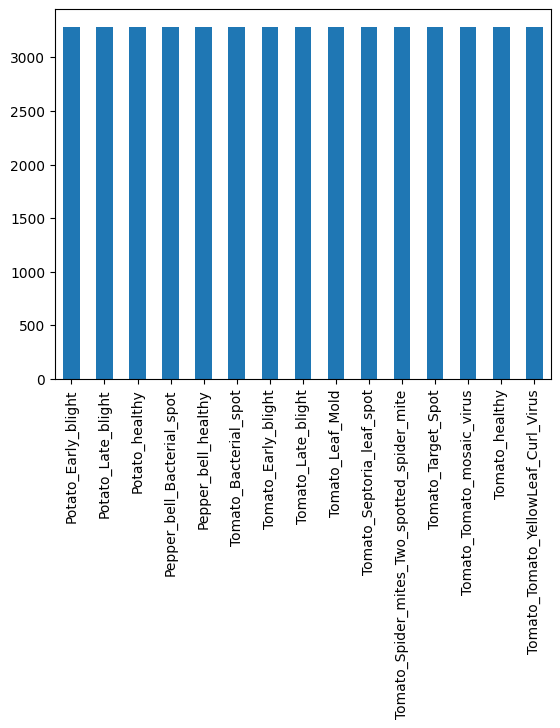

In [ ]:
import pandas as pd
pd.Series(Y).value_counts().plot(kind="bar")

In [ ]:

label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)
# Y_encoded = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
np.save('classes.npy', Y_encoded)


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Step 3: Initialize the ImageDataGenerator
aug = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Step 4: Fit the augmentator on your data
aug.fit(X)

In [ ]:
from tensorflow.keras.utils import to_categorical


# Step 5: One-hot encode the target feature
Y_onehot = to_categorical(Y_encoded)

# Now, Y_onehot is the one-hot encoded representation of your target feature


In [ ]:
num_classes = Y_onehot.shape[1]

In [ ]:
from tensorflow.keras.utils import to_categorical


# Step 5: One-hot encode the target feature
Y_onehot = to_categorical(Y_encoded)

# Now, Y_onehot is the one-hot encoded representation of your target feature


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X and Y_onehot are your full dataset and corresponding one-hot encoded labels
# Adjust the test_size as needed
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_onehot, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Adjust num_classes based on your problem
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the augmented data
history = model.fit(
    aug.flow(X_train, Y_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,  # Adjust based on your batch size
    epochs=20,  # Adjust based on your preference
    validation_data=(X_val, Y_val)
)


Epoch 1/20
984/984 [==============================] - 72s 55ms/step - loss: 2.8047 - accuracy: 0.1931 - val_loss: 2.1552 - val_accuracy: 0.3063
Epoch 2/20
984/984 [==============================] - 52s 53ms/step - loss: 1.9816 - accuracy: 0.3636 - val_loss: 1.7282 - val_accuracy: 0.4392
Epoch 3/20
984/984 [==============================] - 53s 54ms/step - loss: 1.5295 - accuracy: 0.5114 - val_loss: 1.2950 - val_accuracy: 0.5886
Epoch 4/20
984/984 [==============================] - 52s 52ms/step - loss: 1.2429 - accuracy: 0.6000 - val_loss: 1.0550 - val_accuracy: 0.6584
Epoch 5/20
984/984 [==============================] - 52s 52ms/step - loss: 1.0615 - accuracy: 0.6553 - val_loss: 0.9317 - val_accuracy: 0.7027
Epoch 6/20
984/984 [==============================] - 51s 52ms/step - loss: 0.9351 - accuracy: 0.6964 - val_loss: 0.9662 - val_accuracy: 0.6881
Epoch 7/20
984/984 [==============================] - 52s 53ms/step - loss: 0.8335 - accuracy: 0.7276 - val_loss: 0.8554 - val_accuracy:

247/247 [==============================] - 1s 2ms/step


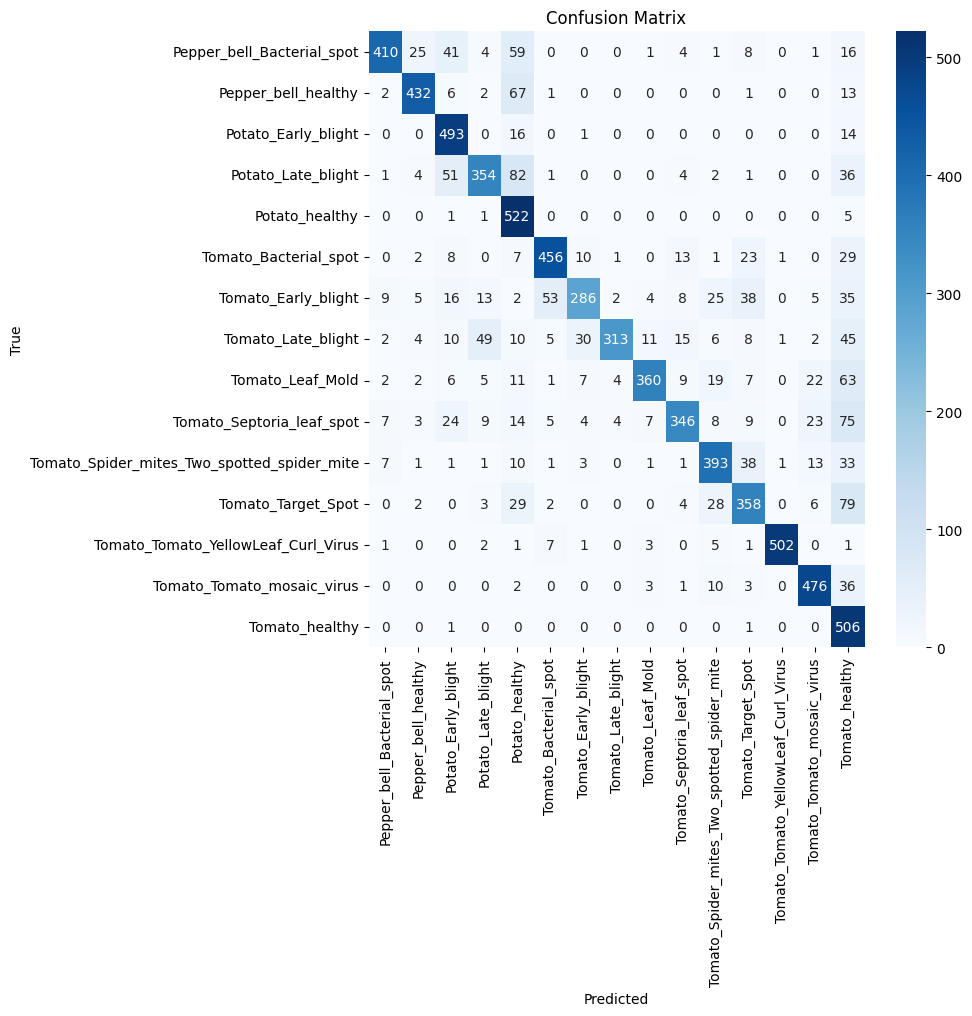

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ... (your existing code for training the model)

# Make predictions on the validation set
Y_pred = model.predict(X_val)
y_pred = np.argmax(Y_pred, axis=1)
y_true = np.argmax(Y_val, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Get original class names from label encoder
class_names = label_encoder.classes_

# Plot confusion matrix with original class names
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Evaluate the model on the test set
evaluation = model.evaluate(X_test, Y_test)

# Display the evaluation metrics
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])


308/308 [==============================] - 1s 4ms/step - loss: 0.7630 - accuracy: 0.7833
Test Loss: 0.7630334496498108
Test Accuracy: 0.7833282351493835


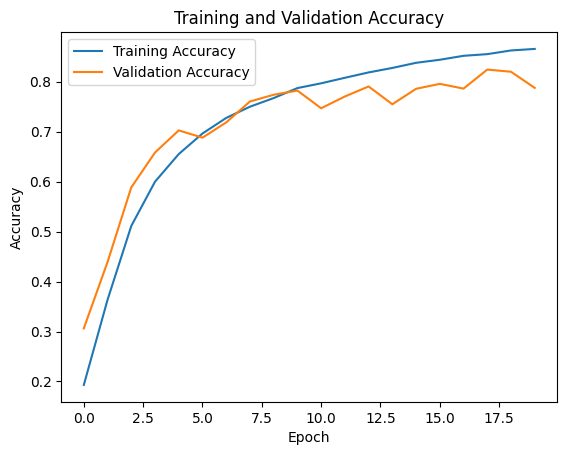

In [ ]:
import matplotlib.pyplot as plt
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

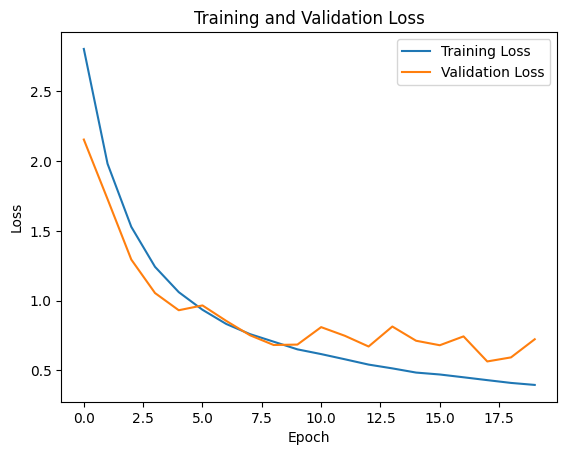

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.save('your_model_name.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


# Initialize the VGG16 model with pre-trained weights
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the convolutional layers
for layer in vgg_model.layers:
    layer.trainable = False

# Create a new model by adding custom layers on top of VGG16
model = Sequential([
    vgg_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model using the augmented data
history = model.fit(
    aug.flow(X_train, Y_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    epochs=20,
    validation_data=(X_val, Y_val)
)

# Evaluate the model on the test set
evaluation = model.evaluate(X_test, Y_test)

# Display the evaluation metrics
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])



58889256/58889256 [==============================] - 0s 0us/step


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 dense_3 (Dense)             (None, 15)                1935      
                                                                 
Total params: 14978895 (57.14 MB)
Trainable params: 264207 (1.01 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Epoch 1/20
984/984 [==============================] - 62s 61ms/step - loss: 2.1829 - accuracy: 0.4117 - val_loss: 1.3574 - val_accuracy: 0.55

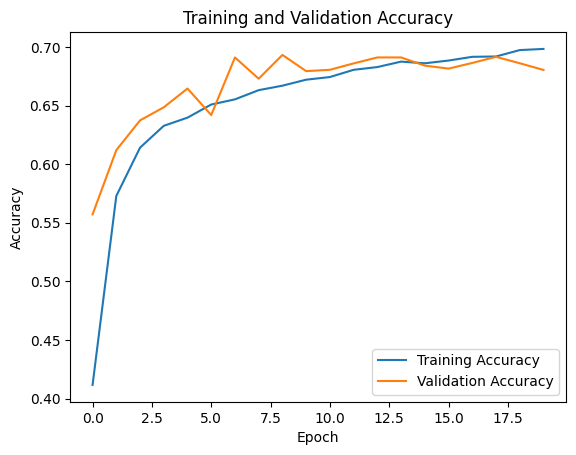

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

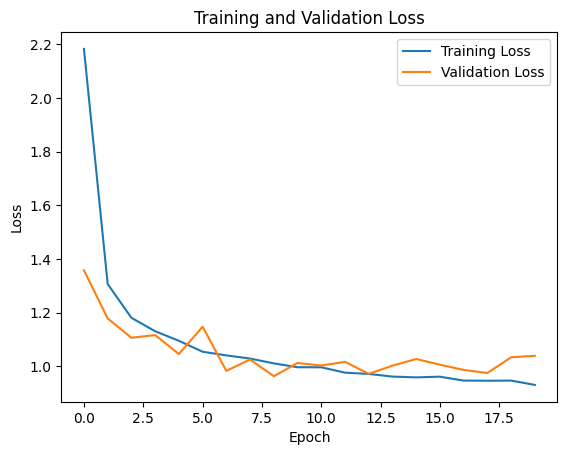

In [ ]:

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
